# Chart Image Classification using CNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Define the paths to your image and csv folders
train_val_dir = "C:\\Users\\sumit\\Desktop\\Machine Learning Assignment\\Assignment-Fractal3\\Chart Image Classification using CNN\\charts\\charts\\train_val" 
test_dir = "C:\\Users\\sumit\\Desktop\\Machine Learning Assignment\\Assignment-Fractal3\\Chart Image Classification using CNN\\charts\\charts\\test"
train_path_labels = "C:\\Users\\sumit\\Desktop\\Machine Learning Assignment\\Assignment-Fractal3\\Chart Image Classification using CNN\\charts\\charts\\train_val.csv" 
train_val_labels = pd.read_csv(train_path_labels)

In [4]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
# Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
# Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [5]:
x_train.shape

(1000, 128, 128, 3)

In [7]:
x_train[:5] 
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
#load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
# Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
# Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_test.npy', images) 
np.save('y_test.npy', labels)

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [9]:
x_test.shape

(50, 128, 128, 3)

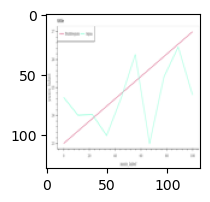

In [10]:
plt.figure(figsize = (10,2)) 
plt.imshow(x_train[10])
plt.imshow(x_train[208]) 
plt.imshow(x_train[444])

In [13]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie'] 
image_classes[0]

# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4} 
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape 
y_test.shape

(50,)

In [15]:
# we need to map the lables from csv to the images somehow # function to test the chart sample

def image_sample(x, y, index):
    plt.figure(figsize = (10,2)) 
    plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type'] 
# plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

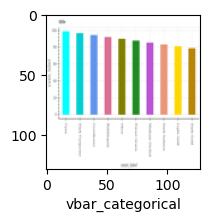

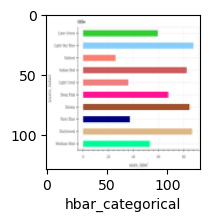

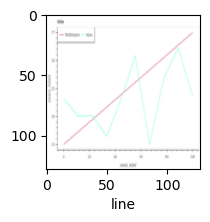

In [16]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208) 
image_sample(x_train,y_train,444)

In [17]:
# normalize the image # x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [18]:
x_test.shape

(1000, 128, 128, 3)

In [19]:
# take the label for train data from csv file

y_train_index = train_val_labels['image_index'] 
y_train_type = train_val_labels['type']

In [20]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [21]:
# writing a simple nn to test first

# Define the model architecture
model = Sequential([
Flatten(input_shape=(128,128,3)), Dense(3000, activation='relu'),
Dense(1000, activation='relu'), Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 17s 510ms/step - loss: 8.3560 - accuracy: 0.1990
Epoch 2/10
32/32 [==============================] - 17s 526ms/step - loss: 1.6364 - accuracy: 0.1980
Epoch 3/10
32/32 [==============================] - 18s 553ms/step - loss: 1.6265 - accuracy: 0.1930
Epoch 4/10
32/32 [==============================] - 17s 513ms/step - loss: 1.6192 - accuracy: 0.2230
Epoch 5/10
32/32 [==============================] - 17s 516ms/step - loss: 1.6078 - accuracy: 0.2200
Epoch 6/10
32/32 [==============================] - 17s 544ms/step - loss: 1.6164 - accuracy: 0.2060
Epoch 7/10
32/32 [==============================] - 16s 495ms/step - loss: 1.6007 - accuracy: 0.2470
Epoch 8/10
32/32 [==============================] - 15s 481ms/step - loss: 1.6105 - accuracy: 0.2240
Epoch 9/10
32/32 [==============================] - 16s 496ms/step - loss: 1.6274 - accuracy: 0.1910
Epoch 10/10
32/32 [==============================] - 16s 485ms/step - loss: 1.6146 - accura

In [22]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [23]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 123ms/step - loss: 1.6131 - accuracy: 0.1900


[1.613120675086975, 0.1899999976158142]

In [25]:
y_pred = model.predict(x_test) 
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 1s 124ms/step


In [26]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape) 
print("Train Labels Shape:", y_train.shape) 
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 1.6128 - accuracy: 0.1737 - val_loss: 2.0872 - val_accuracy: 0.1900
Epoch 2/50
1/1 [==============================] - 7s 7s/step - loss: 2.0471 - accuracy: 0.2025 - val_loss: 1.5943 - val_accuracy: 0.2250
Epoch 3/50
1/1 [==============================] - 7s 7s/step - loss: 1.5945 - accuracy: 0.2037 - val_loss: 1.5983 - val_accuracy: 0.2900
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 1.6039 - accuracy: 0.2425 - val_loss: 1.5967 - val_accuracy: 0.3650
Epoch 5/50
1/1 [==============================] - 7s 7s/step - loss: 1.6001 - accuracy: 0.3325 - val_loss: 1.5917 - val_accuracy: 0.3650
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 1.5929 - accuracy: 0.3688 - val_loss: 1.5899 - val_accuracy: 0.1950
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 1.5883 - accuracy: 0.2525 - val_loss: 1.5847 - val_accuracy: 0.1700
Epoch 8/50
1/1 [=========================

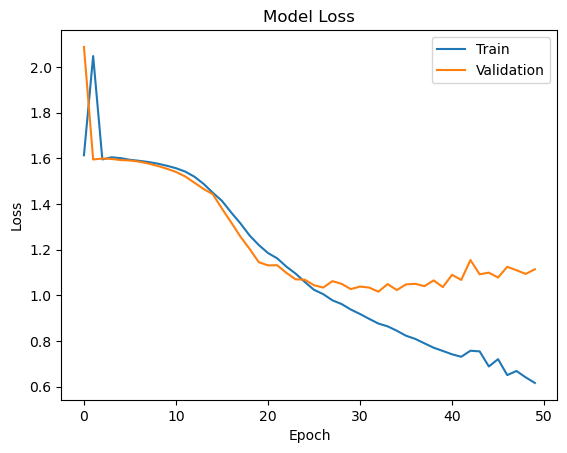

In [29]:
# modify the model architecture to cmnn
cnn_model = Sequential([
Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)), MaxPooling2D(pool_size=(2,2)),
Conv2D(32, (3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64, (3,3), activation='relu'), MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(128, activation='relu'), Dense(5, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.show()

In [30]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 71ms/step - loss: 1.1135 - accuracy: 0.5800


[1.1134775876998901, 0.5799999833106995]

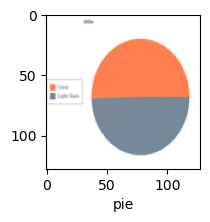

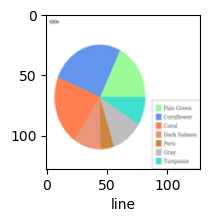

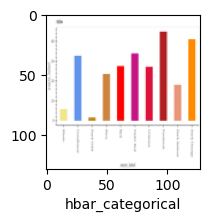

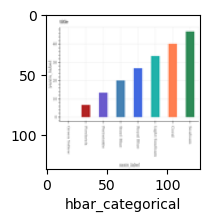

In [31]:
image_sample(x_test,y_test,1) 
image_sample(x_test,y_test,50) 
image_sample(x_test,y_test,25) 
image_sample(x_test,y_test,30)

In [32]:
y_pred = cnn_model.predict(x_test) 
y_pred[:5]

7/7 [==============================] - 1s 71ms/step


array([[3.4305209e-01, 4.0343013e-01, 1.6138956e-01, 2.6235601e-02,
        6.5892696e-02],
       [1.2193929e-01, 2.0978311e-03, 2.0931568e-03, 3.9741445e-02,
        8.3412826e-01],
       [2.2110581e-01, 1.8452907e-03, 1.9566559e-03, 5.0407019e-03,
        7.7005154e-01],
       [7.5119352e-01, 7.4015721e-04, 6.5191947e-03, 1.7577561e-02,
        2.2396952e-01],
       [5.1494861e-01, 1.9035989e-01, 1.9614449e-01, 1.9301891e-02,
        7.9245053e-02]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred] 
y_classes[:5]

[1, 4, 4, 0, 0]

In [34]:
y_test[:5]

array([0, 4, 4, 4, 0])

'dot_line'

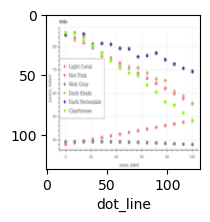

In [35]:
# test actual and predicted

# image_sample(x_test,y_test,1) #actual # image_classes[y_classes[1]] #predicted


# image_sample(x_test,y_test,10) #actual # image_classes[y_classes[10]] #predicted

image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [36]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.45      0.35      0.39        37
           1       0.65      0.82      0.73        44
           2       0.66      0.44      0.53        48
           3       0.43      0.58      0.49        33
           4       0.68      0.71      0.69        38

    accuracy                           0.58       200
   macro avg       0.57      0.58      0.57       200
weighted avg       0.58      0.58      0.57       200



In [38]:
conf_mat = confusion_matrix(y_test, y_classes)

print('Confusion Matrix:') 
print(conf_mat)

Confusion Matrix:
[[13 11  2  3  8]
 [ 4 36  1  1  2]
 [ 6  3 21 18  0]
 [ 0  5  6 19  3]
 [ 6  0  2  3 27]]


Text(95.72222222222221, 0.5, 'Actual')

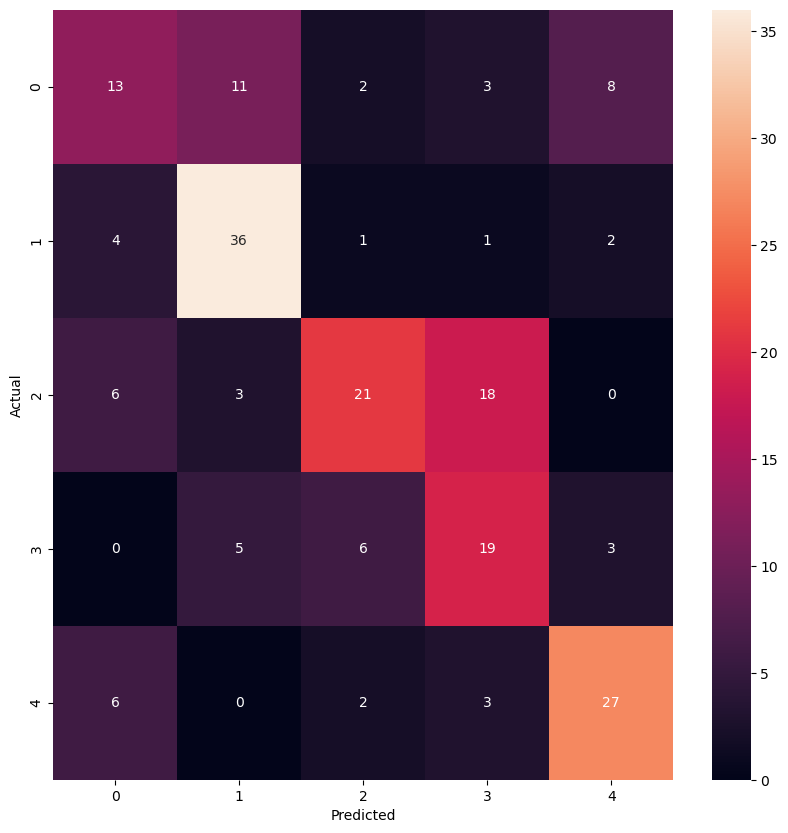

In [39]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [41]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)

predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [42]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers: layer.trainable = False

In [43]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
# Set up data generators for image augmentation and feeding data to the model

train_datagen = ImageDataGenerator( rescale=1./255,
rotation_range=20,
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32) 
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [50]:
# Train the model with early stopping

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True) 
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\sumit\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
